# Step 1: Importing the data

In [2]:
### importing relevant libraries ###
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#### Importing the stock_list file (train+supplemental)####
df=pd.read_csv("/Users/theresa/Desktop/课件/Fil_Rouge/train_files/train_stock_prices.csv")
supplemental=pd.read_csv('/Users/theresa/Desktop/课件/Fil_Rouge/train_files/supplemental_stock_prices.csv')
df=df.append(supplemental)
df.head()

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/802343431.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(supplemental)


RowId        Date  SecuritiesCode    Open    High     Low   Close  \
0  20170104_1301  2017-01-04            1301  2734.0  2755.0  2730.0  2742.0   
1  20170104_1332  2017-01-04            1332   568.0   576.0   563.0   571.0   
2  20170104_1333  2017-01-04            1333  3150.0  3210.0  3140.0  3210.0   
3  20170104_1376  2017-01-04            1376  1510.0  1550.0  1510.0  1550.0   
4  20170104_1377  2017-01-04            1377  3270.0  3350.0  3270.0  3330.0   

    Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag    Target  
0    31400               1.0               NaN            False  0.000730  
1  2798500               1.0               NaN            False  0.012324  
2   270800               1.0               NaN            False  0.006154  
3    11300               1.0               NaN            False  0.011053  
4   150800               1.0               NaN            False  0.003026

# Step 2: Data Analysis
## 1.Exploring the data
## 2.Data Cleaning
## 3.Data Manipulation,using one stock

### 1.Exploring the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2602412 entries, 0 to 269880
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   RowId             object        
 1   Date              datetime64[ns]
 2   SecuritiesCode    int64         
 3   Open              float64       
 4   High              float64       
 5   Low               float64       
 6   Close             float64       
 7   Volume            int64         
 8   AdjustmentFactor  float64       
 9   ExpectedDividend  float64       
 10  SupervisionFlag   bool          
 11  Target            float64       
dtypes: bool(1), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 240.7+ MB


In [9]:
df.shape

(2602412, 12)

In [5]:
df.isnull().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   8426
High                   8426
Low                    8426
Close                  8426
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2581536
SupervisionFlag           0
Target                  246
dtype: int64

In [6]:
df = pd.DataFrame(df)

df['Date'] = pd.to_datetime(df['Date'])

df[df['Close'].isnull()].groupby('Date').size().sort_values(ascending=False)

Date
2020-10-01    1988
2022-04-15      16
2017-03-16      15
2019-04-04      14
2019-10-09      14
              ... 
2018-12-27       1
2017-11-06       1
2017-11-02       1
2021-02-09       1
2021-05-10       1
Length: 1310, dtype: int64

In [7]:
df[(df["Date"] == "2020-10-01") & df.isnull().any(axis=1)]

RowId       Date  SecuritiesCode  Open  High  Low  Close  \
1755040  20201001_1301 2020-10-01            1301   NaN   NaN  NaN    NaN   
1755041  20201001_1332 2020-10-01            1332   NaN   NaN  NaN    NaN   
1755042  20201001_1333 2020-10-01            1333   NaN   NaN  NaN    NaN   
1755043  20201001_1375 2020-10-01            1375   NaN   NaN  NaN    NaN   
1755044  20201001_1376 2020-10-01            1376   NaN   NaN  NaN    NaN   
...                ...        ...             ...   ...   ...  ...    ...   
1757023  20201001_9990 2020-10-01            9990   NaN   NaN  NaN    NaN   
1757024  20201001_9991 2020-10-01            9991   NaN   NaN  NaN    NaN   
1757025  20201001_9993 2020-10-01            9993   NaN   NaN  NaN    NaN   
1757026  20201001_9994 2020-10-01            9994   NaN   NaN  NaN    NaN   
1757027  20201001_9997 2020-10-01            9997   NaN   NaN  NaN    NaN   

         Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag    Target  
1755040       0               1.0               NaN            False  0.029208  
1755041       0               1.0               NaN            False  0.027211  
1755042       0               1.0               NaN            False  0.027695  
1755043       0               1.0               NaN            False  0.023833  
1755044       0               1.0               NaN            False  0.022152  
...         ...               ...               ...              ...       ...  
1757023       0               1.0               NaN            False  0.023297  
1757024       0               1.0               NaN            False  0.041621  
1757025       0               1.0               NaN            False  0.034006  
1757026       0               1.0               NaN            False  0.025047  
1757027       0               1.0               NaN            False  0.004301  

[1988 rows x 12 columns]

### On this day, they had stopped all stock trading due to a system malfunction 😂

In [14]:
df["Date"].nunique()

1337

In [8]:
df.groupby('SecuritiesCode').size().sort_values(ascending=True).head(140)

SecuritiesCode
4169     367
7342     368
4168     368
7358     369
4167     370
        ... 
9519    1302
4699    1316
2729    1320
6470    1337
6471    1337
Length: 140, dtype: int64

There are around 140 stocks doesn't have full 1337 days data.

In [11]:
df.head()

RowId       Date  SecuritiesCode    Open    High     Low   Close  \
0  20170104_1301 2017-01-04            1301  2734.0  2755.0  2730.0  2742.0   
1  20170104_1332 2017-01-04            1332   568.0   576.0   563.0   571.0   
2  20170104_1333 2017-01-04            1333  3150.0  3210.0  3140.0  3210.0   
3  20170104_1376 2017-01-04            1376  1510.0  1550.0  1510.0  1550.0   
4  20170104_1377 2017-01-04            1377  3270.0  3350.0  3270.0  3330.0   

    Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag    Target  
0    31400               1.0               NaN            False  0.000730  
1  2798500               1.0               NaN            False  0.012324  
2   270800               1.0               NaN            False  0.006154  
3    11300               1.0               NaN            False  0.011053  
4   150800               1.0               NaN            False  0.003026

### 2.Data Cleaning

In [15]:
## use the "AdjustmentFactor" to adjust the "Close"
df["Close"]=df["Close"]*df["AdjustmentFactor"]
df=df.drop(columns=['RowId','ExpectedDividend','SupervisionFlag',"AdjustmentFactor"],axis=1).reset_index(drop=True)

In [16]:
## Sorting our data set by Security code, then by date
df.sort_values(by=['SecuritiesCode', 'Date'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

Date  SecuritiesCode    Open    High     Low   Close  Volume  \
0       2017-01-04            1301  2734.0  2755.0  2730.0  2742.0   31400   
1       2017-01-05            1301  2743.0  2747.0  2735.0  2738.0   17900   
2       2017-01-06            1301  2734.0  2744.0  2720.0  2740.0   19900   
3       2017-01-10            1301  2745.0  2754.0  2735.0  2748.0   24200   
4       2017-01-11            1301  2748.0  2752.0  2737.0  2745.0    9300   
...            ...             ...     ...     ...     ...     ...     ...   
2602407 2022-06-20            9997   693.0   697.0   683.0   687.0  122600   
2602408 2022-06-21            9997   692.0   709.0   692.0   706.0  204800   
2602409 2022-06-22            9997   706.0   716.0   703.0   707.0  150200   
2602410 2022-06-23            9997   704.0   713.0   704.0   707.0  114700   
2602411 2022-06-24            9997   710.0   725.0   710.0   719.0  139600   

           Target  
0        0.000730  
1        0.002920  
2       -0.001092  
3       -0.005100  
4       -0.003295  
...           ...  
2602407  0.001416  
2602408  0.000000  
2602409  0.016973  
2602410  0.013908  
2602411  0.015089  

[2602412 rows x 8 columns]

In [17]:
df.isnull().sum()

Date                 0
SecuritiesCode       0
Open              8426
High              8426
Low               8426
Close             8426
Volume               0
Target             246
dtype: int64

In [18]:
## fill the null value of each 'SecuritiesCode'
securaty_code=df["SecuritiesCode"].unique().tolist()
processed_dfs = []
for s in securaty_code:
  sdf=df[df['SecuritiesCode']==s]
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
  sdf['Low'].fillna((sdf['Low'].ffill() + sdf['Low'].bfill()) / 2, inplace=True)
  sdf['Close'].fillna((sdf['Close'].ffill() + sdf['Close'].bfill()) / 2, inplace=True)
  sdf["future2"]=sdf["Close"].shift(-2)
  sdf["future1"]=sdf["Close"].shift(-1)
  sdf["Target"].fillna((sdf["future2"]-sdf["future1"])/sdf["future1"],inplace=True)
  sdf.fillna(0,inplace=True)
  processed_dfs.append(sdf)
df = pd.concat(processed_dfs, ignore_index=True)

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf["Target"].fillna((sdf["future2"]-sdf["future1"])/sdf["future1"],inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf["Target"].fillna((sdf["future2"]-sdf["future1"])/sdf["future1"],inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf["Target"].fillna((sdf["future2"]-sdf["future1"])/sdf["future1"],inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['High'].fillna((sdf['High'].ffill() + sdf['High'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.fillna(0,inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Open'].fillna((sdf['Open'].ffill() + sdf['Open'].bfill()) / 2, inplace=True)
/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2062944473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

Date              0
SecuritiesCode    0
Open              0
High              0
Low               0
Close             0
Volume            0
Target            0
future2           0
future1           0
dtype: int64

In [19]:
df.isnull().sum()

Date              0
SecuritiesCode    0
Open              0
High              0
Low               0
Close             0
Volume            0
Target            0
future2           0
future1           0
dtype: int64

### 3.Data manipulation, using one stock

In [20]:
### generate random stock for the analysis
import random
random.seed(69)
random_security_code = random.sample(securaty_code,1)
random_security_code

[7550]

In [21]:
## Creation of the random_security_code train_stock_
df_rd = df[df["SecuritiesCode"] == random_security_code[0]]
print(df_rd.shape)

(1337, 10)


In [22]:
## drop the column of "SecuritiesCode"
df_rd=df_rd.drop(["SecuritiesCode"],axis=1)
df_rd

Date    Open    High     Low   Close  Volume    Target  future2  \
1809894 2017-01-04  1943.0  1946.0  1932.0  1938.0  383000  0.005685   1946.0   
1809895 2017-01-05  1935.0  1949.0  1924.0  1935.0  378300 -0.007194   1932.0   
1809896 2017-01-06  1930.0  1948.0  1928.0  1946.0  363500  0.016046   1963.0   
1809897 2017-01-10  1932.0  1944.0  1924.0  1932.0  427700 -0.012226   1939.0   
1809898 2017-01-11  1942.0  1971.0  1940.0  1963.0  473400 -0.002579   1934.0   
...            ...     ...     ...     ...     ...     ...       ...      ...   
1811226 2022-06-20  3175.0  3175.0  3120.0  3140.0  212400  0.012500   3240.0   
1811227 2022-06-21  3150.0  3215.0  3150.0  3200.0  303300 -0.001543   3235.0   
1811228 2022-06-22  3235.0  3290.0  3225.0  3240.0  440100  0.004637   3250.0   
1811229 2022-06-23  3225.0  3270.0  3210.0  3235.0  282100 -0.001538      0.0   
1811230 2022-06-24  3250.0  3270.0  3235.0  3250.0  250500  0.004622      0.0   

         future1  
1809894   1935.0  
1809895   1946.0  
1809896   1932.0  
1809897   1963.0  
1809898   1939.0  
...          ...  
1811226   3200.0  
1811227   3240.0  
1811228   3235.0  
1811229   3250.0  
1811230      0.0  

[1337 rows x 9 columns]

<Axes: xlabel='Date'>

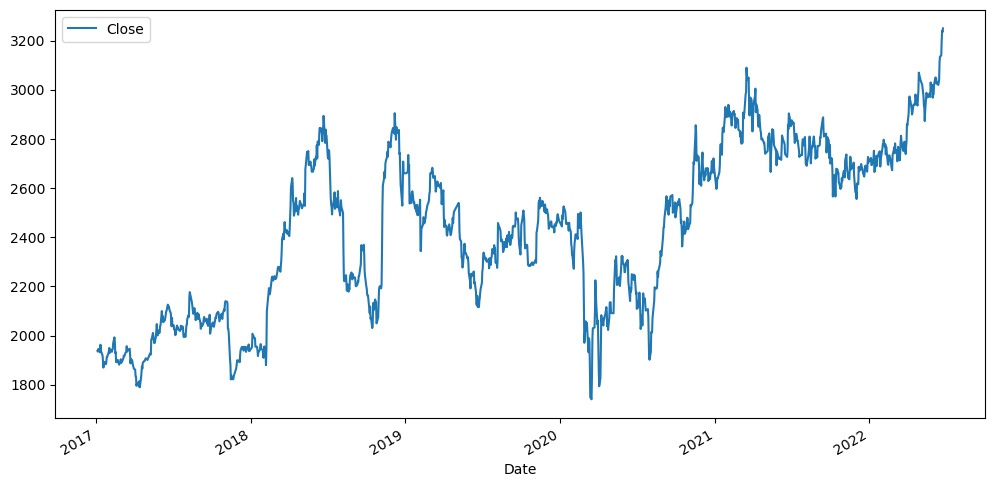

In [23]:
## Displaying the Close value of the random_security_code stock over time
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,6))
df_rd.plot("Date","Close",ax=ax)

<Axes: ylabel='Frequency'>

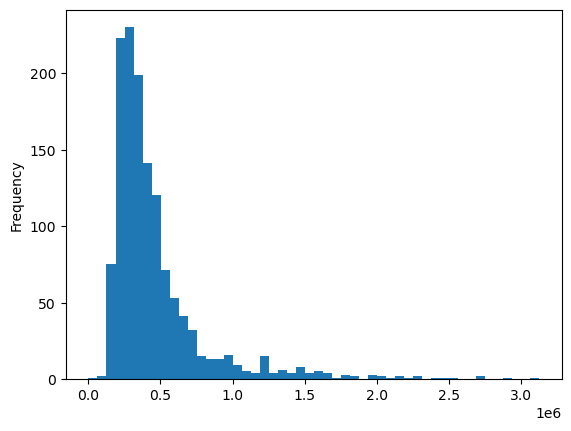

In [24]:
## Displaying the Volume of the random_security_code stock over time
df_rd["Volume"].plot.hist(bins=50)

##### We will be building our machine learning model based on this one stock

# Step 3: Machine Learning in Python
### 1. ARIMA
### 2. Random Forest Regressor
### 3. LGBMRegressor

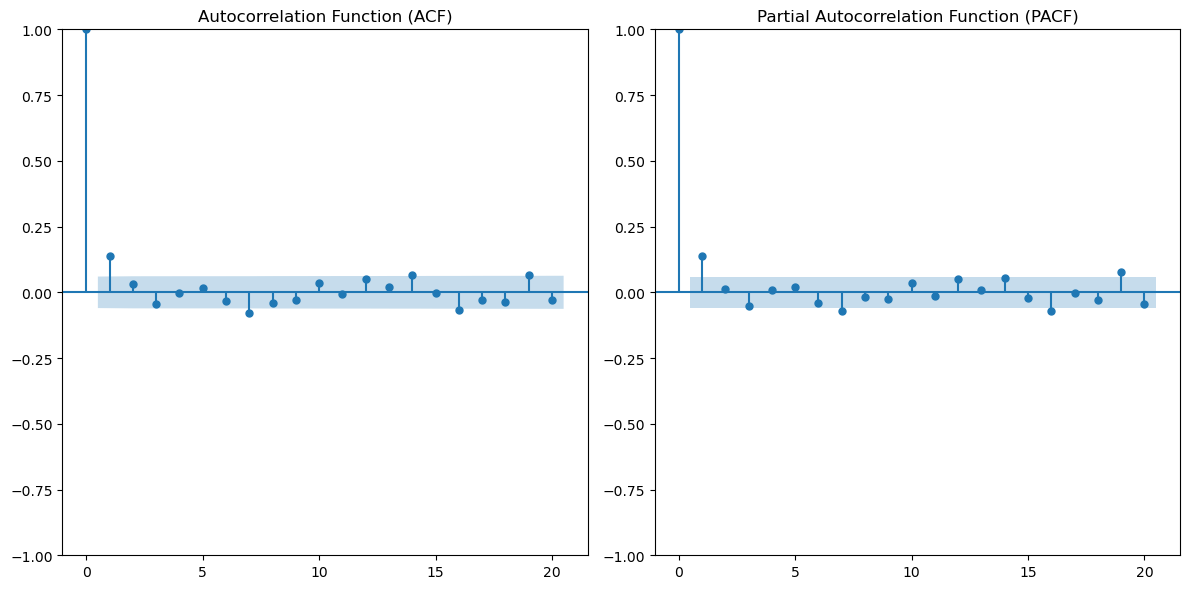

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

time_series=df_rd["Target"]

# Determine the split point
split_ratio = 0.8  # 80-20 split
split_index = int(len(time_series) * split_ratio)

# Split the data into training and testing sets
train_data = time_series[:split_index]
test_data = time_series[split_index:]

lags = 20
acf_values = acf(train_data, nlags=lags)
pacf_values = pacf(train_data, nlags=lags)

# plot ACF and PACF 
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(train_data, lags=lags, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(train_data, lags=lags, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

model = auto_arima(train_data, start_p=0, start_q=0,
                   max_p=1, max_q=1,
                   start_P=0, seasonal=False,
                   d=0, D=0, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5716.600, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5734.859, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5733.733, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5732.945, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5733.503, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.186 seconds


In [33]:
# Fit ARIMA model
model = ARIMA(train_data, order=(1, 0, 0)) 
result = model.fit()
print(result.summary())
steps = len(test_data)  
forecast = result.predict(start=len(train_data), end=len(train_data) + steps - 1, typ='levels') 

                               SARIMAX Results                                
Dep. Variable:                 Target   No. Observations:                 1069
Model:                 ARIMA(1, 0, 0)   Log Likelihood                2869.751
Date:                Mon, 04 Dec 2023   AIC                          -5733.503
Time:                        22:18:18   BIC                          -5718.579
Sample:                             0   HQIC                         -5727.849
                               - 1069                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.797      0.426      -0.001       0.002
ar.L1          0.1364      0.022      6.249      0.000       0.094       0.179
sigma2         0.0003   7.74e-06     35.216      0.0

/Users/theresa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/theresa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/theresa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/theresa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/theresa/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarni

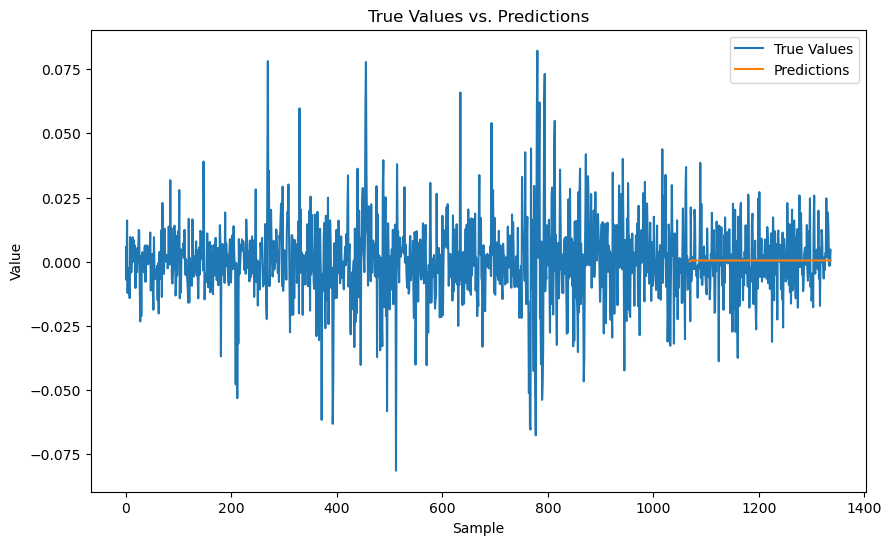

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df_rd['Target'].values, label='True Values')
plt.plot(forecast, label='Predictions')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.title('True Values vs. Predictions')
plt.show()

### 2. Random Forest Regressor

In [46]:
## Add some important features
import talib
feature_names = ['Open', 'High', 'Low', 'Close', 'Volume']
for n in [20,50,100]:

    # Create the moving average indicator and divide by Adj_Close
    df_rd['MA' + str(n)] = df_rd['Close'].rolling(window=n).mean()
    # Create the RSI indicator
    df_rd['RSI' + str(n)] = talib.RSI(df_rd['Close'].values,
                              timeperiod=n)
    df_rd['pct_change'+str(n)]=df_rd['Close'].pct_change(n)
    
    df_rd['volatility'+str(n)]=np.log(df_rd['Close']).diff().rolling(n).std()
    
    df_rd['EMA'+str(n)] = df_rd['Close'].ewm(span=n, adjust=False).mean()
    # Add rsi and moving average to the feature name list
    feature_names = feature_names  + ['MA' + str(n)]+['pct_change'+str(n)]+['volatility'+str(n)]+['EMA'+str(n)]+['RSI' + str(n)]

df_rd["Signal"] = np.where(df_rd["MA20"] > df_rd["MA50"],1,0)
df_rd["Position"] = df_rd["Signal"].diff()
df_rd['Upper_BB'] = df_rd['MA50'] + (df_rd['Close'].rolling(window=50).std() * 2)
df_rd['Lower_BB'] = df_rd['MA50'] - (df_rd['Close'].rolling(window=50).std() * 2)


feature_names=feature_names+["Signal"]+["Position"]+['Upper_BB']+['Lower_BB']
print(feature_names)

['Open', 'High', 'Low', 'Close', 'Volume', 'MA20', 'pct_change20', 'volatility20', 'EMA20', 'RSI20', 'MA50', 'pct_change50', 'volatility50', 'EMA50', 'RSI50', 'MA100', 'pct_change100', 'volatility100', 'EMA100', 'RSI100', 'Signal', 'Position', 'Upper_BB', 'Lower_BB']


In [47]:
## create features and targets
features = df_rd[feature_names]
targets = df_rd["Target"]
features.fillna(0,inplace=True)

/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/3289709731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0,inplace=True)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np

In [49]:
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 600, 1000]}

# Assuming X_train, X_test, y_train, and y_test are defined elsewhere
# Load your data
X = df_rd[feature_names]
y = df_rd["Target"]
X.fillna(0,inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=random_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for prediction
y_pred = best_estimator.predict(X_test)

# Evaluate the model on the test set
print(best_estimator.score(X_train, y_train))
print(best_estimator.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.mean(np.abs(y_test - y_pred)))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/var/folders/tw/qlq79hjn3fv6bp1p6s6z60fr0000gn/T/ipykernel_9057/2018125922.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0,inplace=True)


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_f

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_

/Users/theresa/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
294 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/theresa/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/theresa/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/theresa/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  F

0.48116637171229404
0.09770102894576749
0.014910576328452609
0.010549270204817005


In [50]:
best_estimator

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=1000,
                      random_state=42)

In [59]:
# Evaluate the model on the test set
print("r2_score:",best_estimator.score(X_test, y_test))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):",np.mean(np.abs(y_test - y_pred)))

r2_score: 0.09770102894576749
Mean Squared Error (MSE):  0.0002223252864466113
Mean Absolute Error (MAE): 0.010549270204817005


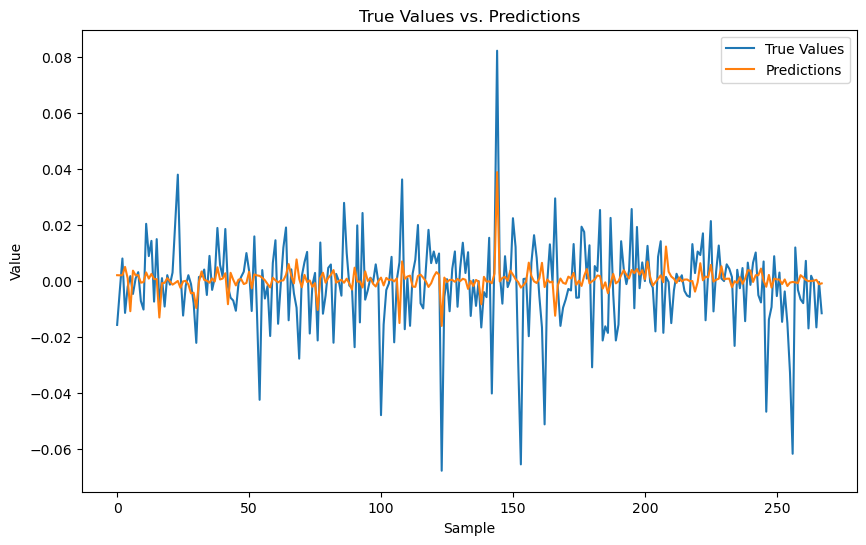

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(y_pred, label='Predictions')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.title('True Values vs. Predictions')
plt.show()

### 3. LGBMRegressor

In [61]:
from scipy.stats import pearsonr

def feval_pearsonr(preds, train_data):
    labels = train_data.get_label()
    return 'pearsonr', pearsonr(labels, preds)[0], True


In [62]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have your data in Pandas Series format
# For instance, y_train and y_test are Pandas Series

# Combine your series into a LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define your parameters
params_lgb = {
    'learning_rate': 0.005,
    'metric': 'None',
    'objective': 'regression',
    'boosting': 'gbdt',
    'verbosity': 0,
    'n_jobs': -1,
    'force_col_wise': True
}

# Train the model
model = lgb.train(
    params=params_lgb,
    train_set=train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=3000,
    feval=feval_pearsonr,  # Using custom evaluation function
    callbacks=[
        lgb.early_stopping(stopping_rounds=300, verbose=True),
        lgb.log_evaluation(period=100)
    ]
)


Training until validation scores don't improve for 300 rounds
[100]	training's pearsonr: 0.605395	valid_1's pearsonr: 0.184312
[200]	training's pearsonr: 0.686504	valid_1's pearsonr: 0.216185
[300]	training's pearsonr: 0.732395	valid_1's pearsonr: 0.229372
[400]	training's pearsonr: 0.772121	valid_1's pearsonr: 0.246295
[500]	training's pearsonr: 0.802949	valid_1's pearsonr: 0.251504
[600]	training's pearsonr: 0.82679	valid_1's pearsonr: 0.260276
[700]	training's pearsonr: 0.844032	valid_1's pearsonr: 0.26799
[800]	training's pearsonr: 0.859387	valid_1's pearsonr: 0.272212
[900]	training's pearsonr: 0.872519	valid_1's pearsonr: 0.275818
[1000]	training's pearsonr: 0.883563	valid_1's pearsonr: 0.274286
[1100]	training's pearsonr: 0.893035	valid_1's pearsonr: 0.27346
[1200]	training's pearsonr: 0.901796	valid_1's pearsonr: 0.274575
Early stopping, best iteration is:
[924]	training's pearsonr: 0.875492	valid_1's pearsonr: 0.2764


In [65]:
pred_lgb=model.predict(X_test)

In [67]:
# Evaluate the model on the test set
print("r2_score:",best_estimator.score(X_test, pred_lgb))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, pred_lgb))
print("Mean Absolute Error (MAE):",np.mean(np.abs(y_test - pred_lgb)))

r2_score: 0.5194069232509785
Mean Squared Error (MSE):  0.000235187034215522
Mean Absolute Error (MAE): 0.010968749687230744


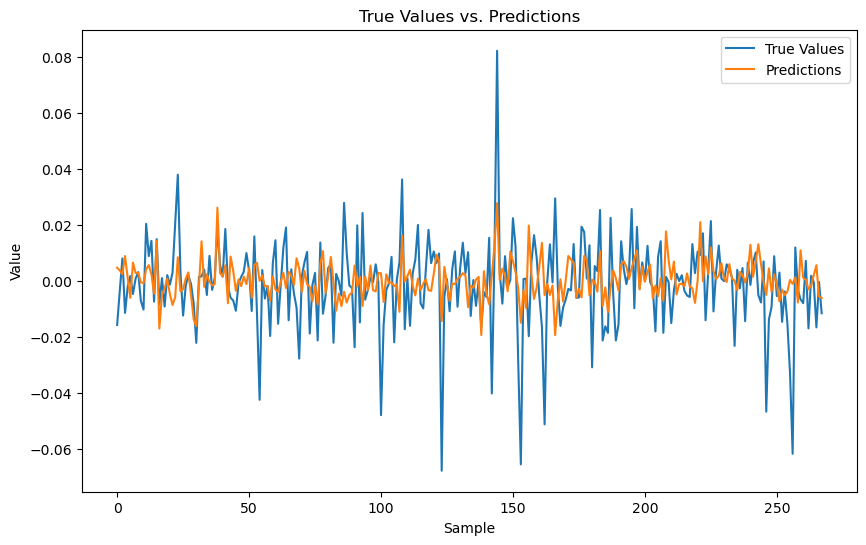

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(pred_lgb, label='Predictions')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.title('True Values vs. Predictions')
plt.show()